In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [30]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
titanic_df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

<Axes: xlabel='Sex'>

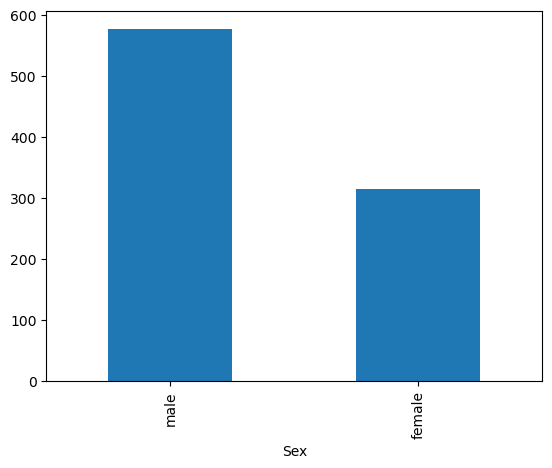

In [11]:
titanic_df['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='count'>

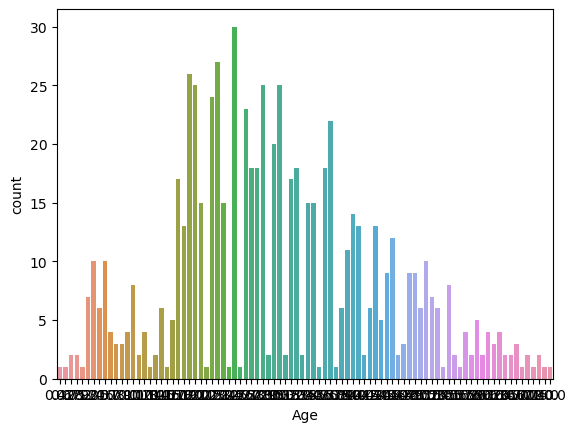

In [14]:
sns.countplot(data=titanic_df, x='Age')

<Axes: xlabel='Sex', ylabel='count'>

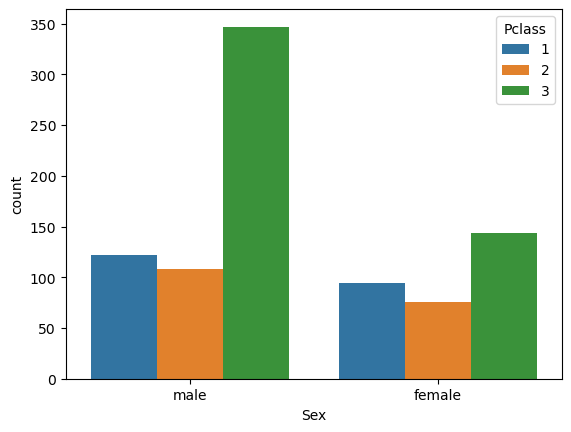

In [15]:
sns.countplot(titanic_df, x='Sex', hue='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

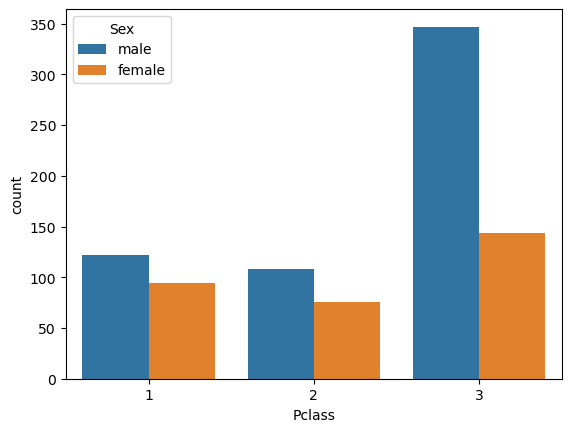

In [16]:
sns.countplot(titanic_df, hue='Sex', x='Pclass')

In [31]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
        
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

<Axes: xlabel='Pclass', ylabel='count'>

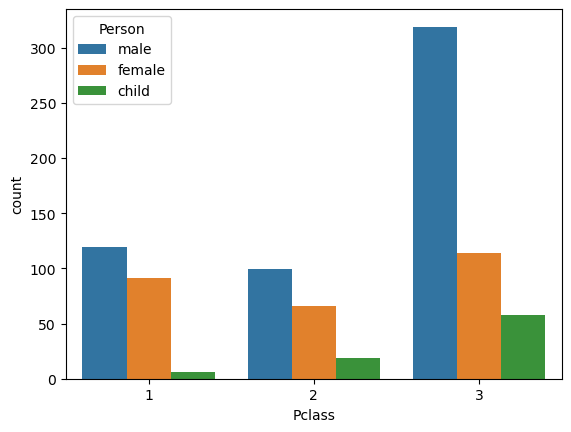

In [35]:
sns.countplot(titanic_df,  hue='Person', x = 'Pclass')

<Axes: >

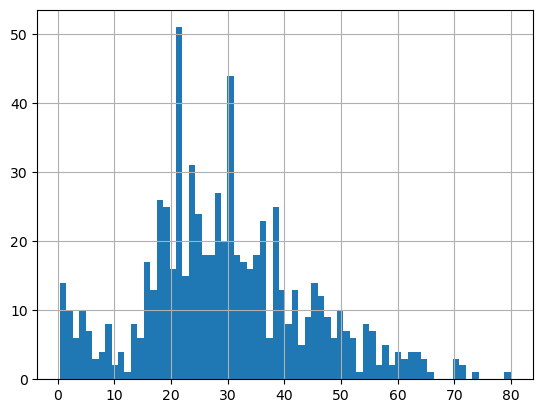

In [38]:
titanic_df['Age'].hist(bins=70)

In [40]:
titanic_df['Age'].mean()

29.69911764705882

In [41]:
titanic_df['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

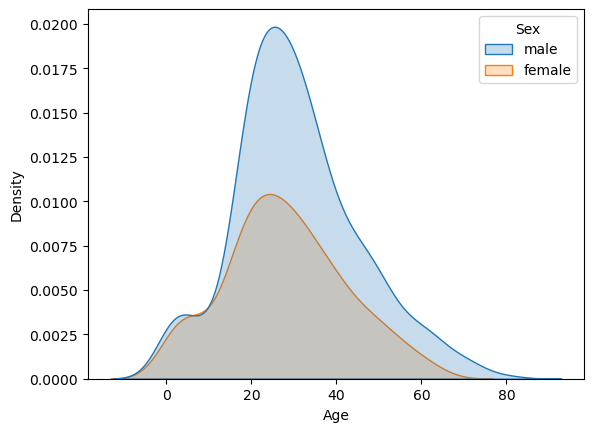

In [46]:
sns.kdeplot(titanic_df, x='Age', hue='Sex', fill=1)

<Axes: xlabel='Age', ylabel='Density'>

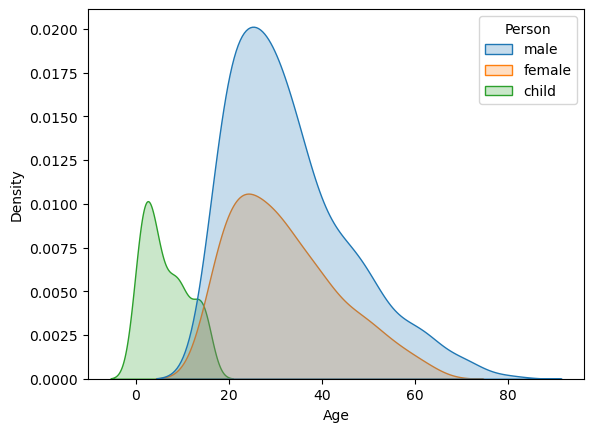

In [47]:
sns.kdeplot(titanic_df, x='Age', hue='Person', fill=1)

<Axes: xlabel='Age', ylabel='Density'>

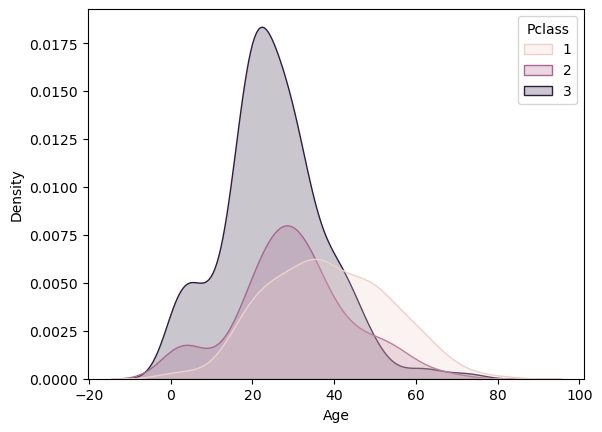

In [49]:
sns.kdeplot(titanic_df, x='Age', hue='Pclass', fill=1)

In [50]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [51]:
deck = titanic_df['Cabin'].dropna()

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object


<Axes: xlabel='Cabin', ylabel='count'>

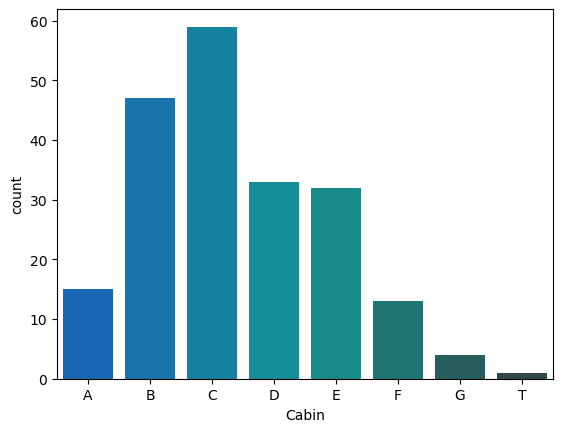

In [91]:
levels = [level[0] for level in deck]

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(cabin_df, 
             x='Cabin', 
             palette='winter_d', 
             order= sorted(set(levels))
             )

<Axes: xlabel='Cabin', ylabel='count'>

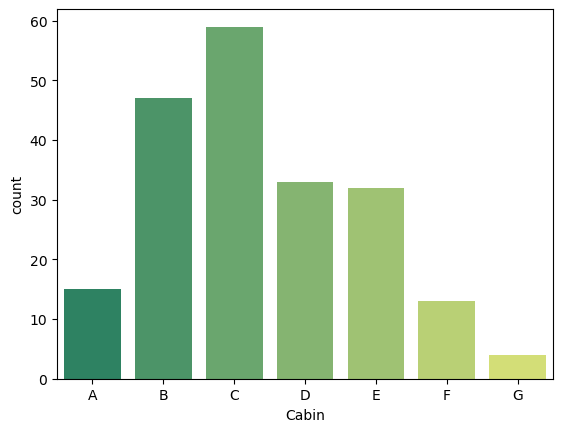

In [105]:
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

sns.countplot(cabin_df,
                            x='Cabin',
                             palette='summer',
                             order = sorted(set(cabin_df['Cabin'])))

In [106]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<Axes: xlabel='Embarked', ylabel='count'>

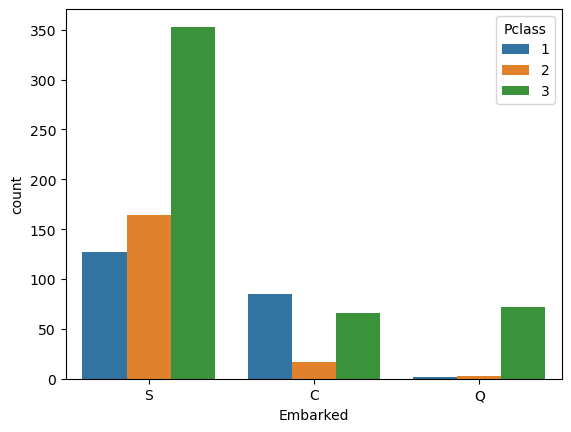

In [110]:
sns.countplot(titanic_df, x='Embarked', hue = 'Pclass')

In [115]:
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [116]:
titanic_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [117]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [119]:
titanic_df['Alone'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df.Alone

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [120]:
titanic_df.Alone = titanic_df.Alone.apply(lambda x: 'With Family' if x > 0 else 'Alone')

In [122]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<Axes: xlabel='Alone', ylabel='count'>

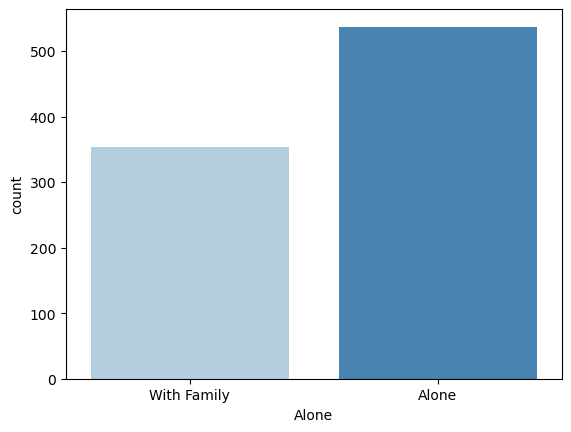

In [124]:
sns.countplot(titanic_df, x='Alone', palette='Blues')

<Axes: xlabel='Survivor', ylabel='count'>

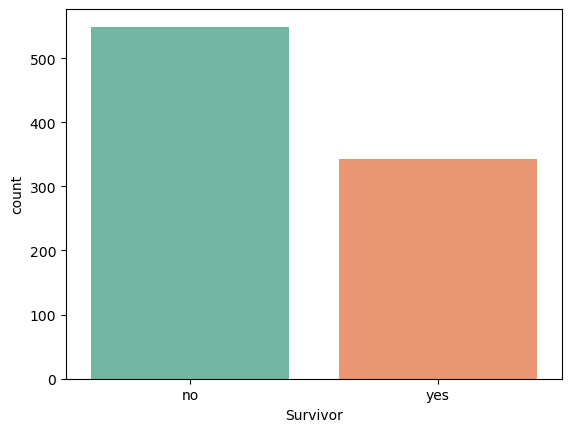

In [130]:
titanic_df["Survivor"] = titanic_df["Survived"].map({0:"no", 1:"yes"})
sns.countplot(titanic_df, x='Survivor', palette='Set2')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


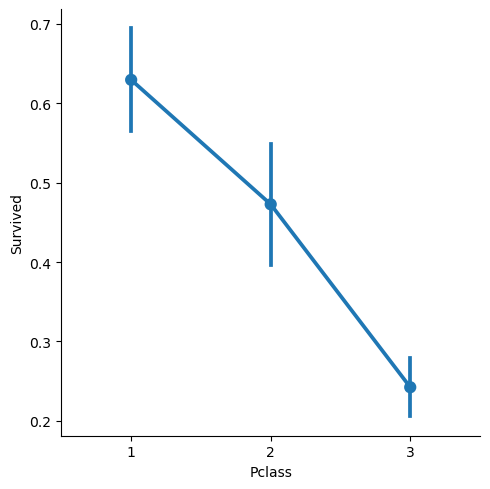

In [136]:
sns.catplot(titanic_df, x='Pclass', y='Survived', order=[1,2,3], kind="point")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


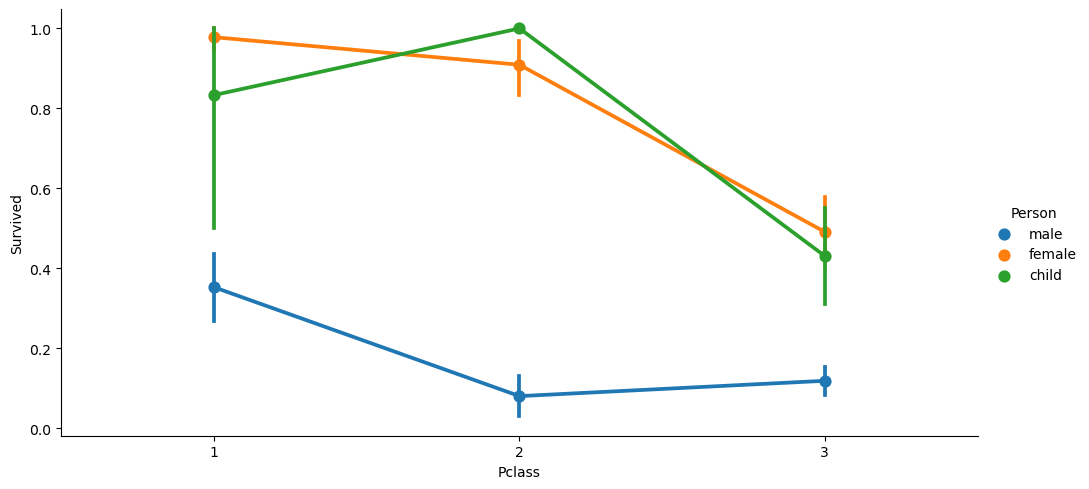

In [140]:
sns.catplot(titanic_df, 
            x='Pclass', 
            y='Survived', 
            hue='Person',
            order=[1,2,3],
            kind="point",
           aspect=2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


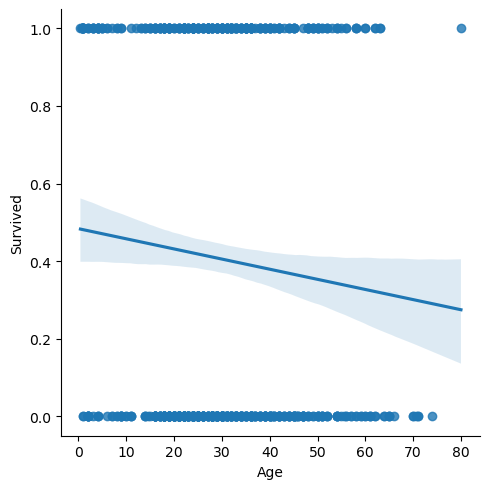

In [141]:
sns.lmplot(titanic_df, x='Age', y='Survived')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


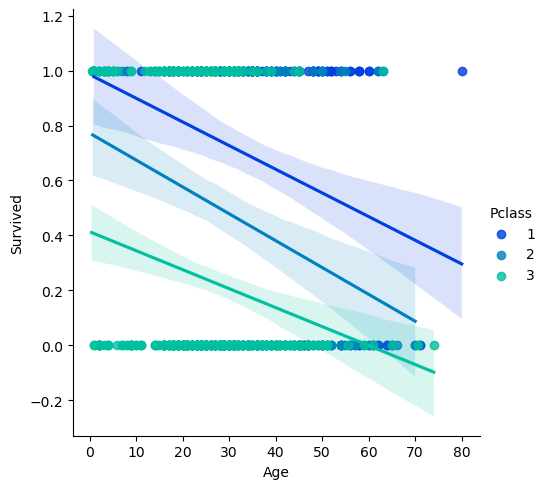

In [142]:
sns.lmplot(titanic_df,
          x='Age',
          y='Survived',
          hue='Pclass',
          palette='winter',
          hue_order=[1,2,3])

In [143]:
generations=[10,20,30,40,60,80]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


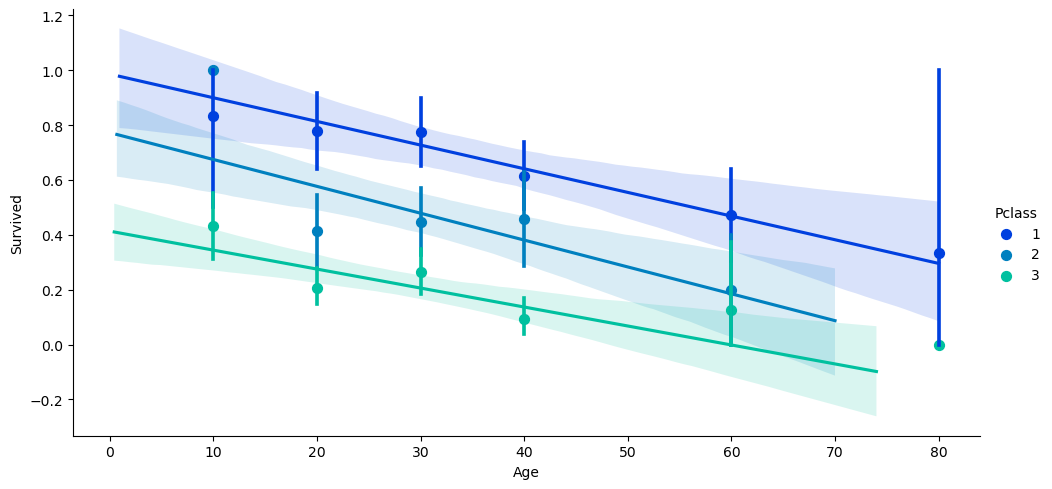

In [146]:
sns.lmplot(titanic_df,
          x='Age',
          y='Survived',
          hue='Pclass',
          palette='winter',
           x_bins=generations,
          hue_order=[1,2,3],
          aspect=2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


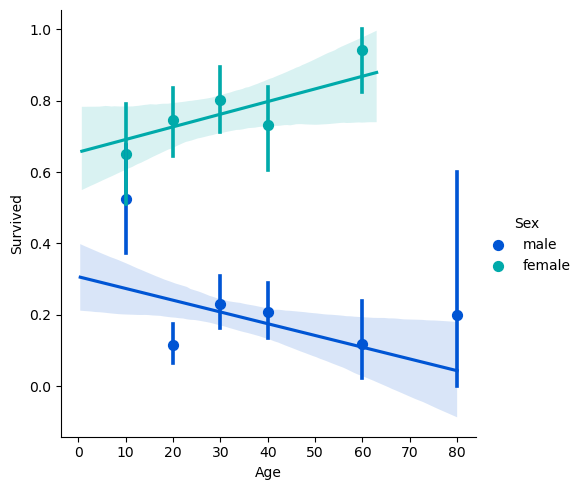

In [148]:
sns.lmplot(titanic_df,
          x='Age',
          y='Survived',
          hue='Sex',
          palette='winter',
          x_bins=generations)